## CNN 이미지 처리

In [ ]:
import os
import time
import tensorflow as tf
import numpy as np

In [ ]:
label_dimensions = 10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
training_size = len(train_images)
test_size = len(test_images)

In [ ]:
# train image 변환
train_images = np.asarray(train_images, dtype = np.float32) / 255
train_images = train_images.reshape((training_size, 28, 28, 1))

In [ ]:
# test image 변환
test_images = np.asarray(test_images, dtype = np.float32) / 255
tset_images = test_images.reshape((test_size, 28, 28, 1))

In [ ]:
# 라벨 변환
train_labels = tf.keras.utils.to_categorical(train_images, label_dimensions)
test_labels = tf.keras.utils.to_categorical(test_images, label_dimensions)

train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)


In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 10)
(10000, 28, 28, 10)


In [ ]:
# tf.keras 함수형 API로 convolution model 구축

In [ ]:
inputs = tf.keras.Input(shape = (28, 28, 1))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'ReLU')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2)(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'ReLU')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2)(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'ReLU')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation = 'ReLU')(x)
predict = tf.keras.layers.Dense(label_dimensions, activation = 'softmax')(x)

In [ ]:
# CNN 구조 확인

model = tf.keras.Model(inputs = inputs, outputs = predict)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

In [ ]:
# model compile
optimizer = tf.keras.optimizers.SGD()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
# GPU 사용 설정
strategy = None
#strategy = tf.distribute.MirroredStrategy()
config = tf.estimator.RunConfig(train_distribute=strategy)

In [ ]:
# 추정기로 변환
estimator = tf.keras.estimator.model_to_estimator(model, config = config)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
# 훈련, 테스트용 데이터 입력 함수
def input_fn(images, labels, epochs, batch_size):
  dataset = tf.data.Dataset.from_tensor_slices((images, labels)) # 입력 값을 dataset으로 변환
  shuffle_size = 5000 # 차례 바꿔줌 (무작위화)
  dataset = dataset.shuffle(shuffle_size).repeat(epochs).batch(batch_size)
  dataset = dataset.prefetch(None)

  return dataset

In [ ]:
# 배치사이즈, 에포크 설정

batch_size = 512
epochs = 50

In [ ]:
 estimator_train_result = estimator.train(input_fn = \
                                          lambda:input_fn(train_images, train_labels, epochs = epochs, batch_size = batch_size))
 print(estimator_train_result)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


## 컨볼루젼 신경망 (CNN, Convolutional Neural Networks)

In [ ]:
# 컨볼루젼된 출력 숙지 (ConvNets)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'ReLU', input_shape = (28, 28, 1)))

# 하나의 입력 채널로 28*28  이미지에 3*3 컨볼루젼을 적용해 32개의 출력 채널 생성

In [ ]:
# 풀링 계층: 특징 맵의 출력을 요약하기 위해, 단일 특징 맵에서 생성된 출력의 공간적 연속성을 사용하고
# 부분행렬의 값을 집계하여 물리적 영역과 연관된 의미를 합성적으로 기술하는 하나의 단일 출력값 생성

# MaxPooling을 주로 사용함 (해당 지역에서 관찰된 최대 활성화값 출력)

# 예시
model.add(layers.MaxPooling2D((2,2))) # 2*2 MaxPooling 계층 정의

In [ ]:
# LeNet
# MaxPooling을 통해 더 낮은 계층에서 컨볼루션 연산을 교대 수행하는 것
# 다중 특징 맵에 가중치를 공유한 로컬 수용 필드를 기반으로 함
# 그런 다음 은닉층과 소프트맥스를 출력 계층으로 사용하는 기존의 다층 퍼셉트톤 기반으로 더 높은 계층 연결


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [ ]:
epochs = 5
batch_size = 128
verbose = 1
optimizer = tf.keras.optimizers.Adam()
validation_spilt = 0.95

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
nb_classes = 10 # number of outputs = number of digits

In [ ]:
# ConvNet 정의
def build(input_shape, classes):
  model = models.Sequential()
  # ConV -> ReLU -> Pooling
  model.add(layers.Conv2D(20, (5, 5), activation = 'ReLU', input_shape = input_shape))
  model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
  model.add(layers.Conv2D(50, (5, 5), activation = 'ReLU'))
  model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
  # 500개의 뉴런과 10개 부류 가진 소프트맥스 분류기 획득

  # Flatten -> ReLU layers
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation = 'ReLU'))

  # 소프트맥스 분류기
  model.add(layers.Dense(nb_classes, activation = 'sigmoid'))
  return model

In [ ]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [ ]:
# 데이터 크기 조정
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [ ]:
# 데이터 정규화
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# Float32 형태로 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# 부류 벡터를 이진 부류 행렬로 변환
y_trian = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
# 최적화기와 모델 초기화
model = build(input_shape = input_shape, classes = nb_classes)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 50)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [ ]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir = './logs')]

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    verbose = verbose, validation_split = validation_spilt,
                    callbacks = callbacks)

score = model.evaluate(x_test, y_test, verbose = verbose)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

In [ ]:
# 딥러닝으로 CIFAR-10 이미지 인식
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

img_channels = 3
img_rows = 32
img_cols = 32
input_shape = (img_rows, img_cols, 3)

In [ ]:
batch_size = 128
epochs = 20
classes = 10
verbose = 1
validation_split = 0.2
optim = tf.keras.optimizers.RMSprop()

In [ ]:
# 데이터 로드 및 전처리 함수 정의

def load_data():
  import numpy as np
  (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # 데이터 정규화
  mean = np.mean(x_train, axis = (0,1,2,3))
  std = np.std(x_train, axis = (0,1,2,3))
  x_train = (x_train-mean)/(std+1e-7)
  x_test = (x_test-mean)/(std+1e-7)

  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes)

  return x_train, y_train, x_test, y_test

In [ ]:
def build(input_shape, classes):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation = 'ReLU', input_shape = input_shape))
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation = 'ReLU'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(classes, activation = 'softmax'))

  return model

In [ ]:
# 데이터 로드
num_classes = 10
(x_train, y_train, x_test, y_test) = load_data()

In [ ]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir = './logs')]

# 모델 훈련
model = build(input_shape = input_shape, classes = classes)
model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = verbose,
                    validation_split = validation_split, callbacks = callbacks)

score = model.evaluate(x_test, y_test, verbose = verbose)
print("\ntest score:", score[0])
print("\ntest acuuracy:", score[1])

# 정확도: 68.15%

Epoch 1/20
313/313 [==============================] - 62s 194ms/step - loss: 1.6780 - accuracy: 0.4147 - val_loss: 1.2994 - val_accuracy: 0.5386
Epoch 2/20
313/313 [==============================] - 61s 196ms/step - loss: 1.2956 - accuracy: 0.5426 - val_loss: 1.1486 - val_accuracy: 0.5913
Epoch 3/20
313/313 [==============================] - 61s 194ms/step - loss: 1.1550 - accuracy: 0.5926 - val_loss: 1.0824 - val_accuracy: 0.6165
Epoch 4/20
313/313 [==============================] - 61s 195ms/step - loss: 1.0630 - accuracy: 0.6255 - val_loss: 1.0401 - val_accuracy: 0.6334
Epoch 5/20
313/313 [==============================] - 63s 201ms/step - loss: 0.9831 - accuracy: 0.6533 - val_loss: 1.0014 - val_accuracy: 0.6504
Epoch 6/20
313/313 [==============================] - 61s 194ms/step - loss: 0.9243 - accuracy: 0.6737 - val_loss: 1.0198 - val_accuracy: 0.6471
Epoch 7/20
313/313 [==============================] - 63s 201ms/step - loss: 0.8709 - accuracy: 0.6974 - val_loss: 0.9548 - val_ac

In [ ]:
# 심층 신경망으로 CIFAR-10 성능 향상
# 층을 여러 개 쌓아서 성능 향상

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
import numpy as np

epochs = 50
num_classes = 10

In [ ]:
# 데이터 로드 및 전처리 함수 정의

def load_data():
  import numpy as np
  (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # 데이터 정규화
  mean = np.mean(x_train, axis = (0,1,2,3))
  std = np.std(x_train, axis = (0,1,2,3))
  x_train = (x_train-mean)/(std+1e-7)
  x_test = (x_test-mean)/(std+1e-7)

  y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes)

  return x_train, y_train, x_test, y_test

In [ ]:
# 모델 설계

def build_model():
  # 첫 번째 블록
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), padding = 'same', input_shape = x_train.shape[1:], activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  model.add(layers.Dropout(0.2))

  # 두 번째 블록
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', input_shape = x_train.shape[1:], activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  model.add(layers.Dropout(0.3))

  # 세 번째 블록
  model.add(layers.Conv2D(128, (3, 3), padding = 'same', input_shape = x_train.shape[1:], activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'ReLU'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size = (2, 2)))
  model.add(layers.Dropout(0.4))

  # 출력 계층
  model.add(layers.Flatten())
  model.add(layers.Dense(num_classes, activation = 'softmax'))

  return model

  model.summary()

In [ ]:
# 데이터 보강으로 CIFAR-10 성능 개선
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)
# 왼쪽부터 임의로 회전하는 각도, 가로 변환, 세로 변환, 이미지 절반 임의로 가로로 뒤집음

In [ ]:
# 모델 저장 방법
(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, verbose = 1, validation_data = (x_test, y_test))
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)
model.save_weights('model.h5') # 모델 저장



# 12회 학습 결과 loss 0.4046, accuracy 0.8597, val_loss 0.5388, val_accuracy 0.825
# 약 82.5%의 정확도
# 학습할수록 점점 개선되는 경향을 보이고 있음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
 11/782 [..............................] - ETA: 7:36 - loss: 4.5102 - accuracy: 0.1506

KeyboardInterrupt: ignored

In [ ]:
# VGG-16 모델 (대규모 이미지 인식)
# 16개의 깊은 층으로 이미지 인식 과정 거침

# 구현
import cv2
im = cv2.resize(cv2.imread('cat.jpg'), (224, 224))

def VGG-16(weights_path = None):




In [ ]:
from tensorflow.keras import Sequential

In [ ]:
# MobileNetV2 활용 말 vs 사람 구분

import os
import time
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(raw_train, raw_val, raw_test), metadata = tfds.load('horses_or_humans', split = ["train[:80%]", "train[80%:90%]", "train[90%:]"], with_info = True, as_supervised = True)

In [ ]:
print(len(raw_train), len(raw_val), len(raw_test))

822 102 103


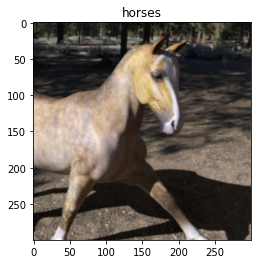

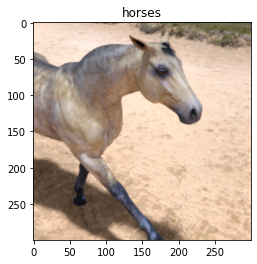

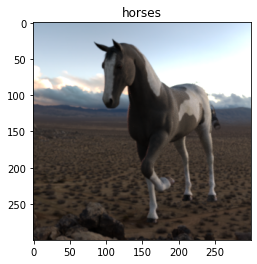

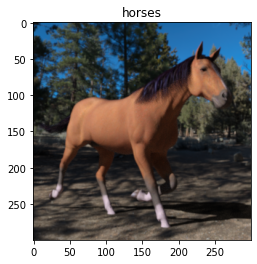

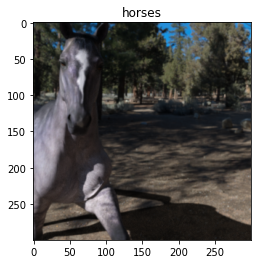

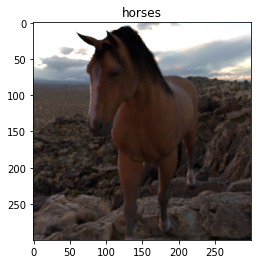

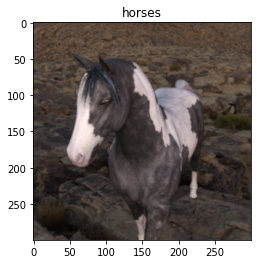

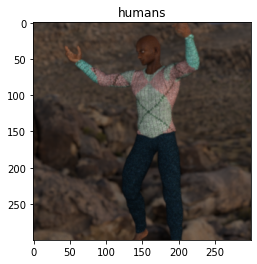

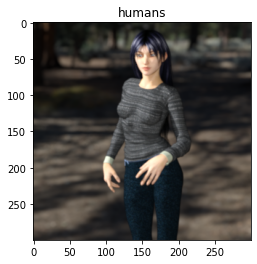

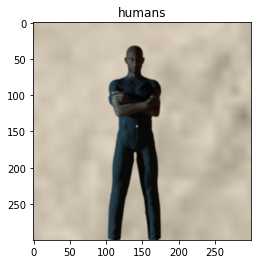

In [ ]:
get_label_name = metadata.features['label'].int2str

def show_images(dataset):
  for image, label in dataset.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

show_images(raw_train)

In [ ]:
# MobileNetV2 형태에 맞게 데이터 전처리
img_size = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (img_size, img_size))
  return image, label

train = raw_train.map(format_example)
val = raw_val.map(format_example)
test = raw_test.map(format_example)

In [ ]:
batch_size = 32
shuffle_buffer_size = 2000
train_batchs = train.shuffle(shuffle_buffer_size).batch(batch_size)
val_batchs = val.batch(batch_size)
test.batchs = test.batch(batch_size)

In [ ]:
# 입력으로 MoblieNet 사용 (3차원 텐서, 색상 채널수 3으로 설정)
img_shape = (img_size, img_size, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top = False,
                                               weights = 'imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [ ]:
for image_batch, label_batch in train_batchs.take(1):
  pass
print(image_batch.shape)
# (32, 160, 160, 3): batchsize 32, 160*160 이미지 크기, 색상 3

(32, 160, 160, 3)


In [ ]:
# MoblieNetV2: 160*160*3 의 이미지를 5*5*1280 특징 블록으로 변환
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average)

tf.Tensor(
[[1.0520126e+00 1.0549400e-01 2.3854567e-01 ... 1.9253147e-01
  0.0000000e+00 1.7754363e+00]
 [2.1468835e-01 1.1247219e+00 1.6308770e+00 ... 1.2211418e-02
  1.6418076e-03 4.3395138e-01]
 [1.4393131e+00 2.4733515e-01 1.1392202e+00 ... 8.0749583e-01
  0.0000000e+00 1.1019934e+00]
 ...
 [4.5160770e-01 1.2702179e-02 1.6731800e+00 ... 1.2727500e-01
  1.0106844e+00 7.1023065e-01]
 [1.8283619e-01 1.0675006e+00 4.6507791e-01 ... 1.1211106e+00
  0.0000000e+00 1.2842907e+00]
 [1.9639744e+00 6.5877497e-02 1.2412914e+00 ... 5.1861764e-03
  0.0000000e+00 7.5034302e-01]], shape=(32, 1280), dtype=float32)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch)

tf.Tensor(
[[-0.7671705 ]
 [-1.1007075 ]
 [-2.0349183 ]
 [-1.6225166 ]
 [-0.01958615]
 [-1.8255556 ]
 [-1.5029716 ]
 [-1.6264043 ]
 [-1.4307272 ]
 [-2.5978098 ]
 [-2.0659947 ]
 [-1.5424181 ]
 [-1.2946866 ]
 [-1.3282388 ]
 [-1.5115981 ]
 [-1.6139205 ]
 [-1.6581768 ]
 [-1.2418234 ]
 [-2.0884829 ]
 [-0.59554136]
 [-1.728536  ]
 [-1.4986074 ]
 [-3.6009574 ]
 [-2.5537024 ]
 [-0.5135987 ]
 [-2.0693388 ]
 [-2.8125305 ]
 [-0.5000907 ]
 [-2.2153192 ]
 [-1.3570147 ]
 [ 0.87312484]
 [-1.7866873 ]], shape=(32, 1), dtype=float32)


In [ ]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
# RMSprop() 최적화기로 모델 컴파일
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
num_train, num_val, num_test = (metadata.splits['train'].num_examples*weight/10
                                for weight in split_weights)
initial_epochs = 50
steps_per_epoch = round(num_train) // batch_size
val_steps = 4

loss0, accuracy0 = model.evaluate(val_batchs, steps = val_steps)

4/4 [==============================] - 4s 402ms/step - loss: 5.9280 - accuracy: 0.6078


In [ ]:
# 구성된 망을 반복을 통해 고정되지 않은 계층 최적화
history = model.fit(train_batchs, epochs = initial_epochs, validation_data = val_batchs)

# 대략 20회 근처에서 loss, val_accuracy가 과적합 근처로 향함

Epoch 1/50
26/26 [==============================] - 38s 553ms/step - loss: 8.2166 - accuracy: 0.4623 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 2/50
26/26 [==============================] - 15s 543ms/step - loss: 8.1956 - accuracy: 0.4647 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 3/50
26/26 [==============================] - 16s 605ms/step - loss: 8.1898 - accuracy: 0.4659 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 4/50
26/26 [==============================] - 14s 540ms/step - loss: 8.1886 - accuracy: 0.4659 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 5/50
26/26 [==============================] - 15s 556ms/step - loss: 8.1867 - accuracy: 0.4659 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 6/50
26/26 [==============================] - 15s 544ms/step - loss: 8.1855 - accuracy: 0.4659 - val_loss: 6.0490 - val_accuracy: 0.6078
Epoch 7/50
26/26 [==============================] - 15s 566ms/step - loss: 8.1686 - accuracy: 0.4684 - val_loss: 6.0490 - val_accuracy: 0.6078

In [ ]:
# 텐서플로 Hub: 사전훈련된 모델의 대체 모음
# 예제
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image

In [ ]:
classifier_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification2' #@param {type: 'string'}
image_shape = (224, 224)

# tf.keras와 작업하고자 hub를 래핑
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url,
                                                 input_shape = image_shape+(3, ))])
grace_hopper = tf.keras.utils.get_file('image.jpg',
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(image_shape)

61306/61306 [==============================] - 0s 0us/step


In [ ]:
grace_hopper = np.array(grace_hopper) / 255.0
result = classifier.predict(grace_hopper[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis = -1)
print(predicted_class)

# 위와 같은 방법으로 Hub 계층 래핑. hub.KerasLayer() 활용함

1/1 [==============================] - 0s 106ms/step
819


In [ ]:
# 기타 CNN 아키텍처

# AlexNet
# 최초의 컨볼루션 망 중 하나이고, 8개의 계층으로 이루어져있음
# 5개는 maxpooling 계층, 나머지 3개는 완전 연결되어 있음

# Residual
# 레지듀얼 망은 이전 계층을 더 깊은 계층으로 직접 공급한다는 아이디어에서 착안됨. 이것을 skip connection이라고 함.
# ResNet의 구성요소는 레지듀얼 블록으로서 전방 혹은 고속 전방 연결을 갖고 있음.

# HighwayNets, DenseNets
# 추가 가중치 행렬을 사용해 스킵 가중치를 학습할 수 있는데, 이러한 모델을 HighwatNets라 함,
# 한편, 여러 개의 병렬 스킵이 있는 모델은 DenseNets라고 함.

# HighwayNets는 스킵 연결로 인해 각 반복 중에 전파할 계층 수가 적어져서 더 빨리 학습 가능 (레지듀얼 망과 비슷함)
# DenseNets 예시 참조 (책 246p) -> 여러 개의 층이 있을 때, 병렬 형태로 층을 스킵할 수 있게 설계됨

# Xception
# Xception 망은 깊이별 컨볼루션과 점별 컨볼루션이라는 두 가지 블록을 사용함.

In [ ]:
# 이미지의 질문에 대한 대답 (VQA)
# 이미지 인식과 텍스트 자연어 처리를 결합한 형태
# 모델 예시

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation = 'relu',
                            padding = 'same', input_shape = (224, 224, 3)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation = 'relu',
                            padding = 'same'))
cnn_model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation = 'relu',
                            padding = 'same'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                    

In [ ]:
image_input = layers.Input(shape = (224, 224, 3))
visual_model = cnn_model(image_input)

In [ ]:
# VQA 코딩_텍스트
question_input = layers.Input(shape = (100, ), dtype = 'int32')
embedding = layers.Embedding(input_dim = 1000, output_dim = 256, input_length = 100)(question_input)
encoded_question = layers.LSTM(256)(embedding)

In [ ]:
# 인코딩된 질문, 시각 모델 병합 과정
merged = layers.concatenate([encoded_question, visual_model])
output = layers.Dense(1000, activation = 'softmax')(merged) # 마지막 출력층에 밀집 망 추가 (softmax)

vqa_model = models.Model(inputs = [image_input, question_input], outputs = output)
vqa_model.summary()

# 훈련 옵션 수가 큰 것을 확인 (이미지, 질문-응답 데이터셋이 합쳐졌기 때문)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 256)     256000      ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lstm (LSTM)                    (None, 256)          525312      ['embedding[0][0]']          

In [ ]:
# 스타일 변환
# 간단히 요약하면, 신경망에게 피카소의 그림을 제공하고 그것을 다른 화가의 스타일로 그림을 그리게 하는 것
# 이것에 대해 정의하자면, 두 이미지의 내용이 얼마나 다른지 측정하는 L(content)과
# 두 이미지의 스타일이 얼마나 다른지 측정하는 L(style) 총 2개의 거리함수가 있음.
# 스타일 변환은 이 두 개의 척도를 최소화하려는 최적화 문제로 볼 수 있음

In [ ]:
# 콘텐츠 거리 (content)
# 두 개의 이미지 (콘텐츠 이미지, 입력 이미지)가 주어지면 사전훈련된 VGG19에 의해 추출된 특징으로 표현
# 이미지를 특징 콘텐츠 공간으로 투사해 콘텐츠 거리를 편리하게 계산할 수 있음.

# 품질이 높아지려면 콘텐츠 이미지와 입력 이미지가 비슷해져야한다 (작은 거리). 그래서 표준 역전파로 최소화
# 표준 역전파 방법
def get_content_loss(base_content, target_content):
  return tf.reduce_mean(tf.square(base_content - target_content))

In [ ]:
# 스타일 거리 (style)
# 콘텐츠 이미지의 스타일을 스타일 이미지와 유사하게 만들기 위해 그래디언트 하강 수행
def gram_matrix(input_tensor):
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a = True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  # 각 계층 높이, 너비, 필터 개수 입력
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)

  return tf.reduce_mean(tf.square(gram_style - gram_target))

# VGG10를 특징 추출기로 사용하고, 스타일과 콘텐츠에 대한 두가지 적절한 거리 함수 정의 후
# 적절하게 최소화한다.

In [ ]:
# Deep Dream 망
# 구글에서 만든 컴퓨터비전 프로그램으로, CNN을 활용해 이미지 패턴을 찾아 향상시킴
# 미리 훈련된 망을 사용해 특징을 추출하는데, 이번엔 이미지에서 패턴을 강화(일부 기능 극대화) 함
# 따라서 그래디언트 하강이 아닌 그래디언트 상승을 사용해야 함. (책 256p 참고)

In [ ]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 34 kB/s 
     |████████████████████████████████| 449 kB 54.4 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 3.8 MB 38.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.0.2 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.0.1 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.


In [ ]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet',
                                                 include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


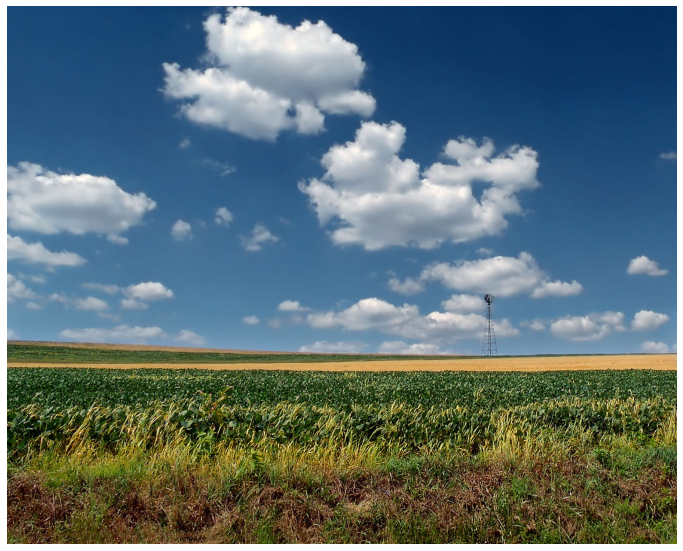

In [ ]:
# 예시
# 이미지 다운로드 후 numpy 계열로 읽음

import numpy as np
import tensorflow as tf

from IPython.display import clear_output
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image


#def download(url):
#  name = url.split("/")[-1]
#  image_path = tf.keras.utils.get_file(name, origin = url)
#  img = image.load_img(image_path)
#  return image.img_to_array(img)
def image_process(img):
  img = image.img_to_array(img)
  return (img/127.5) - 1


# 픽셀을 -1 ~ 1 사이 값으로 조정
#def preprocess(img):
#  img.replace(to_replace=[None], value=np.nan, inplace=True)
#  return (img/127.5)-1

# 전처리된 이미지 원상복구
def deprocess(img):
  img = img.copy()
  img /= 2.
  img += 0.5
  img *= 255.
  return np.clip(img, 0, 255).astype('uint8')

# 이미지 표시
def show(img):
  plt.figure(figsize = (12, 12))
  plt.grid(False)
  plt.axis('off')
  plt.imshow(img)

# url = 'https://commons.wikimedia.org/wiki/File:Flickr_-_Nicholas_T_-_Big_Sky_(1).jpg'
# img = preprocess(download(url))
img = image.load_img('/content/deepmind_practice.jpg') # url 세션 거부로 직접 불러왔음
img = image_process(img)
show(deprocess(img))


In [ ]:
# 계층 활성화 최대화
import tensorflow as tf
from tensorflow.keras.models import Model

names = ['mixed2', 'mixed3', 'mixed4', 'mixed5']
layers = [inception_v3.get_layer(name).output for name in names]

# 특징 추출 모델 생성
feat_extraction_model = tf.keras.Model(inputs = inception_v3.input, outputs = layers)

def forward(img):
  img_batch = tf.expand_dims(img, axis = 0) # 배치 생성
  return feat_extraction_model(img_batch) # 인셉션을 통해 전방 전달, 앞서 선택한 계층의 활성화 함수 추출

In [ ]:
def calc_loss(layer_activations):
  total_loss = 0

  for act in layer_activations:
    # 그래디언트 상승에선 이 값을 최대화하려 하기 때문에, 이미지는 점진적으로 계층을 자극함
    loss = tf.math.reduce_mean(act)

    # 계층의 유닛 개수로 정규화 진행
    loss /= np.prod(act.shape)
    total_loss += loss

  return total_loss

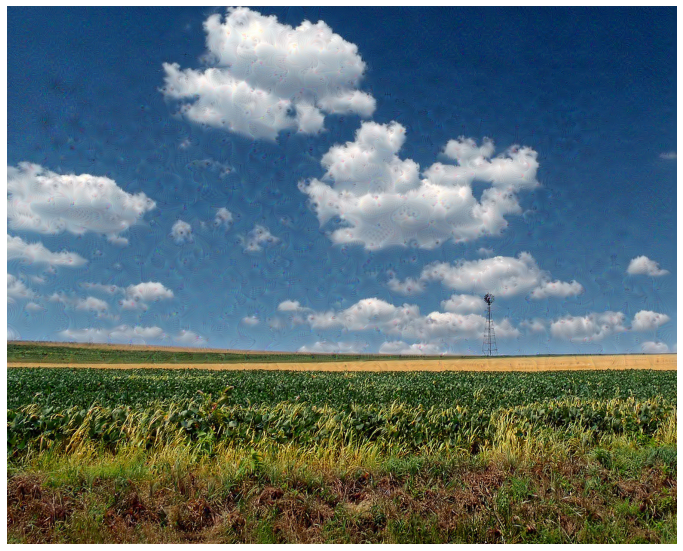

In [ ]:
# 그래디언트 상승 진행

img = tf.Variable(img)
steps = 400

for step in range(steps):
  with tf.GradientTape() as tape:
    activations = forward(img)
    loss = calc_loss(activations)

  gradients = tape.gradient(loss, img)
  # 그래디언트 정규화 진행
  gradients /= gradients.numpy().std() + 1e-8

  # 그래디언트 더해서 이미지 갱신
  img.assign_add(gradients)

  if step % 50 == 0:
    clear_output()
    print("step %d, loss %f" % (step, loss))
    show(deprocess(img.numpy()))
    plt.show()

# 결과 확인
clear_output()
show(deprocess(img.numpy()))

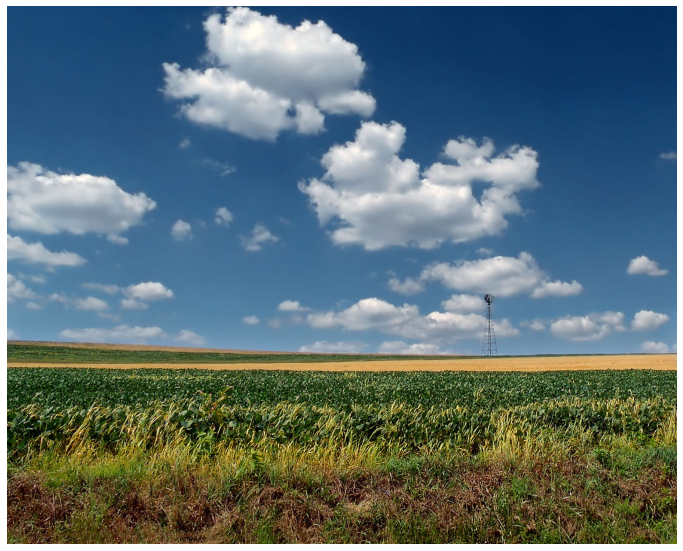

In [ ]:
img = image.load_img('/content/deepmind_practice.jpg') # url 세션 거부로 직접 불러왔음
img = image_process(img)
show(deprocess(img))

# 특성이 조금 더 부각된 것을 확인

In [ ]:
# CNN으로 비디오 처리를 위한 6가지 방법

# 1: 각 비디오 프레임을 2D CNN으로 처리되는 별도의 이미지로 간주해 한번에 하나의 비디오 프레임으로 분류
# 이렇게 되면 비디오 분류 문제를 이미지 분류 문제로 축소시킴

# 2: 2D CNN이 RNN과 결합된 하나의 당일 망으로 만듦. CNN은 이미지 구성 요소를 고려하고 RNN은 각 비디오 시퀀스
# 정보를 고려함. 이런 유형의 망은 최적화할 매개변수가 너무 많아 훈련에 어려움이 있을 수 있음.

# 3: 3D ConvNet을 사용함(3D: 시간, 이미지 폭, 이미지 넓이). 이것도 이미지 분류의 자연스러운 확장으로, 역시 까다로움

# 4: 분류에 직접 CNN을 사용하는 대신 비디오의 각 프레임에 대한 오프라인 특징을 저장하고, 전이학습을 통해
# 특징 추출을 효율적으로 수행함. 모든 특징이 추출된 후에는 RNN에 일련의 입력으로 전달하여 여러 프레임에서
# 시퀀스를 학습하고 최종 분류를 시행함.

# 5: 4번째 방법의 변형으로 최종 계층을 RNN 대신 다층 퍼셉트론으로 수행함. 계산 요구량 방면에서 단순하고 저렴할 수 있음

# 6: 역시 4번째 방법의 변형으로 특징 추출 단계에서 공간과 시각적 특징을 추출하는 3D CNN으로 실현됨. 그 후
# 이러한 특징들은 RNN이나 다층 퍼셉트론으로 전달됨.


## 생성적 적대 신경망 (GAN)

In [ ]:
# GAN: 이미지, 비디오, 음악, 자연어 생성, 이미지 변환, 이미지 초고해상도, 신약 개발 등으로 활용 가능
# GAN 원리
# 생성기 G(Z)는 작품을 위조하고, 판별기 D(Y)는 관찰한 진짜 작품에 기반을 두고 위조품이 얼마나 진짜같은지 판별

# 판별기는 입력으로 이미지같은 예시를 받아 입력 변수가 얼마나 진짜같은지 판단하고자 투표함. 1에 가까울수록 진짜
# 생성기는 랜덤 노이즈 Z에서 입력을 받아, 판별기가 생성기가 생성하는 모든 것이 실제라고 생각하도록 훈련함.

# 판별기의 훈련 목적은 참 데이터 분포에서 모든 이미지는 최대화하고, 참 데이터 분포가 아닌 이미지는 최소화하는 것임.
# 따라서, 생성기와 판별기는 서로 반대의 게임을 하고, 이를 적대적 훈련이라고 함.
# 생성기와 판별기가 교대로 훈련하고, 각각의 목표는 그래디언트 하강을 통해 최적화된 손실 함수로 표현됨.

# 생성 모델은 지속적으로 위변조 능력을 향상시키고, 판별기 신경망은 입력 이미지가 실제인지 생성된 것인지 분류하려 함.
# 중요한 새 아이디어는 생성자가 판별기를 더 자주 속일 수 있는 방법을 학습할 수 있도록, 생성기와 판별기 모두에게
# 역전파해 생성기의 매게 변수를 조정하는 것임. 그래서 생성기는 실제 이미지와 구별할 수 없는 이미지를 생성하는 법 학습함.

# GAN은 두 명의 경기자가 참여한 게임에서 평행을 이루고자 노력함. 이렇게 되면 생성기와 판별기가 서로를 향상시키는데,
# 궁극적으로 어느 한 쪽도 더 이상 눈에 띄게 발전하지 않는 상태에 도달함. 손실 함수를 도식화하여 확인 가능

# 이 때문에 GAN을 훈련하는 것은 매우 어려움. 보통은 GAN의 생성적 응용에선 생성기가 판별기보다 좀 더 잘 학습하길 원함

In [ ]:
# GAN 학습방법
# 먼저 판별기가 학습한다. 생성기는 랜덤 노이즈 z에서 가짜 이미지를 생성하는데 사용한다.
# 생성기가 만든 가짜 이미지와 훈련 데이터셋의 진짜 이미지는 모두 판별기로 전달되고, 판별기는 지도 학습을 통해
# 가짜와 진짜를 구분하려 학습함.

# 다음 단계에선 생성기가 학습하는데, 판별기 생성망이 생성된 이미지가 진짜인 것으로 생각하게끔 속이게 하는 것임.

# 훈련이 종료되면 판별기는 실제와 가짜를 구분할 수 없고, 생성기는 훈련 데이터와 거의 유사한 형태로 데이터 만듦.

In [ ]:
# 텐서플로에서 GAN을 사용한 MNIST 실습
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 값 정규화
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

In [ ]:
# 다층 퍼셉트론 사용을 위한 데이터 차원 변경
x_train = x_train.reshape(60000, 784)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# 생성기 구축
# 생성기 목적: 노이즈 수신하여 훈련 데이터셋과 유사한 이미지 생성 노이즈 입력의 크기는 randomdim으로 설정하고,
# 임의의 정수 값으로 초기화하면 됨 (대개 100이나, 이번 실습에선 10으로) 이 입력은 LeakyReLU와 함께 25개 뉴런을
# 가진 밀집 계층으로 공급됨. 그 후 512개의 은닉 뉴런이 있는 또 다른 밀집 계층을 추가한 후, 1024개 뉴런이 있는
# 세 번째 은닉층과 784개의 뉴런이 있는 출력 계층을 추가함. (출력 장치 뉴런 수 = 훈련 이미지 픽셀 수)
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

randomDim = 10

generator = Sequential()

generator.add(Dense(256, input_dim = randomDim)) # 노이즈 생성기
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation = 'tanh')) # 출력층: 784개, 활성화함수: 탄젠트

In [ ]:
# 판별기 구축
# 훈련 집합이나 생성기의 생성 이미지를 가져오기 때문에, 입력 크기는 784임
# 하지만 출력은 단일 비트이며, 0은 가짜 이미지, 1은 진짜 이미지임 (True or False 구분 목적)

discriminator = Sequential()

discriminator.add(Dense(1024, input_dim = 784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid')) # 출력층: 1, True or False 구분 위해 시그모이드 함수 사용

In [ ]:
# 생성기, 판별기 합쳐 GAN 구성 (trainable 인자를 False로 설정하여 판별기 가중치 고정) - 판별기는 변하면 안되기 때문
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

discriminator.trainable = False
ganInput = Input(shape = (randomDim, ))
x = generator(ganInput)
ganOutput = discriminator(x)
gan =  Model(inputs = ganInput, outputs = ganOutput)

In [ ]:
# 생성기, 판별기를 동시에 훈련하게 하려면, 먼저 판별기를 따로 훈련시키고 판별기의 가중치를 동결하여
# 결합된 gan을 훈련시키는 방식임. 이 과정에서 생성기도 훈련됨 (loss function: 이진 교차 엔트로피)

discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [ ]:
# 훈련 실행
dLosses = []
gLosses = []
def train(epochs = 1, batch_size = 128):
  batchCount = int(x_train.shape[0] / batch_size)
  print('Epochs :', epochs)
  print('batch_size :', batch_size)
  print('batches per epoch :', batchCount)

  for e in range(1, epochs + 1):
    print('-'*15, 'Epoch %d' % e, '-'*15)
    for _ in range(batchCount):
      noise = np.random.normal(0, 1 ,size = [batch_size, randomDim]) # 랜덤 입력 노이즈
      imageBatch = x_train[np.random.randint(0, x_train.shape[0], size = batch_size)] # 노이즈 기반 이미지 배치

      generatedImages = generator.predict(noise) # 가짜 MNIST 이미지 생성 (np 형태로)

      x = np.concatenate([imageBatch, generatedImages])

      yDis = np.zeros(2 * batch_size) # 생성된 것과 실제 이미지의 레이블
      yDis[:batch_size] = 0.9 # 편파적 레이블 평활화

      discriminator.trainable = True
      dloss = discriminator.train_on_batch(x, yDis)

      noise = np.random.normal(0, 1, size = [batch_size, randomDim])
      yGen = np.ones(batch_size)
      discriminator.trainable = False
      gloss = gan.train_on_batch(noise, yGen)

    dLosses.append(dloss)
    gLosses.append(gloss)

    if e == 1 or e % 20 ==0 :
     saveGeneratedImages(e)

In [ ]:
# 각 배치 손실 도식화
def plotLoss(epoch):
  plt.figure(figsize = (10, 8))
  plt.plot(dLosses, label = 'Discriminitive Loss')
  plt.plot(gLosses, label = 'Generative Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

# 생성된 MNIST 나열
def saveGeneratedImages(epoch, examples= 100, dim = (10, 10), figsize = (10, 10)):
  noise = np.random.normal(0, 1 , size = [examples, randomDim])
  generatedImages = generator.predict(noise)
  generatedImages = generatedImages.reshape(examples, 28, 28)

  plt.figure(figsize = figsize)
  for i in range(generatedImages.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generatedImages[i], interpolation = 'nearest', cmap = 'gray_r')

    plt.axis('off')

  plt.tight_layout()

In [ ]:
gan.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 sequential_7 (Sequential)   (None, 784)               1463312   
                                                                 
 sequential_8 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,923,537
Trainable params: 1,463,312
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
train(200, 128)

# 훈련 시간 너무 오래걸려서 패스

In [ ]:
# 심층 컨볼루션 GAN (DCGAN)
# 핵심 아이디어: 풀링 계층이나 최종 분류기 계층 없이 컨볼루젼 계층을 사용하는 것
# 위 원리 대신, 컨볼루젼 스트라이드와 전치 컨볼루젼을 사용해 이미지의 다운샘플링과 업샘플링 수행

# 생성기는 계층을 순차적으로 추가해 구축됨. 첫 번째 계층은 100차원의 노이즈를 입력으로 받는 밀집 계층
# 100차원 입력은 128*7*7 크기의 1차원 벡터로 확장됨. 이 벡터는 UpSampling2D 계층을 사용해 업샘플링 됨.

# 계층에서 이미지와 행과 열을 2배로 업샘플링시켜 14*14*128 크기의 출력을 생성함. 이 이미지는 컨볼루젼
# 계층으로 전달되어 업샘플링된 이미지의 세부 사항을 채우는 방법을 학습함. 더 나은 그래디언트 흐름을 위해
# 배치 정규화로 전달되고, 배치 정규화된 출력은 모든 중간층에서 ReLU 활성화 함수를 거침.

# 다음 생성기에는 2개의 구조가 있는데, 하나는 컨볼루젼 작업에 128개의 필터가 있고, 나머지는 64개의 필터 존재
# 최종 출력은 3개의 필터와 쌍곡 탄젠트 활성화 함수가 있는 순수 컨볼루젼 계층에서 28*28*1 이미지 생성

In [ ]:
# DCGAN 생성기 모델 생성
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

def generator(self):
  model = Sequential()
  model.add(Dense(128*128*7, activation = 'relu', input_dim = self.latent_dim))
  model.add(Reshape((7,7,128)))
  model.add(UpSampling2D())
  model.add(Conv2D(128, kernel_size = 3, padding = 'same'))
  model.add(BatchNormalization(momentum = 0.8))
  model.add(Activation('relu'))
  model.add(UpSampling2D())
  model.add(Conv2D(64, kernel_size = 3, padding = 'same'))
  model.add(BatchNormalization(momentum = 0.8))
  model.add(Activation('relu'))
  model.add(Conv2D(self.channels, kernel_size = 3, padding = 'same'))
  model.add(Activation('tanh'))
  model.summary()
  noise = Input(shape = (self.latent_dim,))
  img = model(noise)
  return Model(noise, img)

In [ ]:
# 판별기 모델 생성
# 기존 GAN과는 달리, 스트라이드가 2인 컨볼루젼 계층을 사용함. 그리고 과적합을 피하고자 드롭아웃 계층을
# 추가하고, 정확성과 수렴 속도를 빠르게 하고자 배치 정규화를 수행함. 활성화 계층: 레키 렐루

def discriminator(self):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = 3, stride = 2, input_shape = self.img_shape, padding = 'same'))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size = 3, stride = 2, padding = 'same'))
  model.add(ZeroPadding2D(padding = ((0,1), (0,1))))
  model.add(BatchNormalization(momentum = 0.8))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size = 3, stride = 2, padding = 'same'))
  model.add(BatchNormalization(momentum = 0.8))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.25))
  model.add(Conv2D(256, kernel_size = 3, stride = 1, padding = 'same'))
  model.add(BatchNormalization(momentum = 0.8))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1, activation = 'sigmoid'))
  model.summary()
  img = Input(shape = self.img_shape)
  validity = model(img)
  return Model(img, validity)

In [ ]:
# 위 둘 모델 합쳐서 GAN 얻기
class DCGAN():
  def __init__(self, rows, cols, channels, z = 100):
    self.img_rows = rows
    self.img_cols = cols
    self.channels = channels
    self.img_shape = (self.img_rows, self.img_cols, self.channels)
    self.latent_dim = z
    optimizer = Adam(0.0002, 0.5)

    self.discriminator = self.discriminator() # 판별기 구축
    self.discriminator.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    self.generator = self.generator() # 생성기 구축

    z = Input(shape = (self.latent_dim,)) # 생성기가 노이즈를 입력으로 받아 이미지 생성
    img = self.generator(z)

    self.discriminator.trainable = False # 결합된 모델에선 생성기만 훈련
    valid = self.discriminator(img) # 판별기는 생성된 이미지를 입력으로 받아 진위여부 파악

    self.combined = Model(z, valid)
    self.combined.compile(loss = 'binary_crossentropy', optimizer = optimizer)

  def generator(self):

    model = Sequential()
    model.add(Dense(128*7*7, activation = 'relu', input_dim = self.latent_dim))
    model.add(Reshape((7,7,128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size = 3, padding = 'same'))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Activation('relu'))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size = 3, padding = 'same'))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Activation('relu'))
    model.add(Conv2D(self.channels, kernel_size = 3, padding = 'same'))
    model.add(Activation('tanh'))
    model.summary()
    noise = Input(shape = (self.latent_dim,))
    img = model(noise)
    return Model(noise, img)

  def discriminator(self):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, strides = 2, input_shape = self.img_shape, padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size = 3, strides = 2, padding = 'same'))
    model.add(ZeroPadding2D(padding = ((0,1), (0,1))))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size = 3, strides = 2, padding = 'same'))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size = 3, strides = 1, padding = 'same'))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    img = Input(shape = self.img_shape)
    validity = model(img)
    return Model(img, validity)


  def train(self, epochs, batch_size = 128, save_interval = 50):
    (x_train, _), (_, _) = mnist.load_data()
    x_train = x_train / 127.5 - 1
    x_train = np.expand_dims(x_train, axis = 3)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
      # 판별기 훈련
      idx = np.random.randint(0, x_train.shape[0], batch_size) # 임의로 이미지 반 선택
      imgs = x_train[idx]

      noise = np.random.normal(0, 1 , (batch_size, self.latent_dim)) # 노이즈 샘플링해서 새 이미지 배치 생성
      gen_imgs = self.generator.predict(noise)

      d_loss_real = self.discriminator.train_on_batch(imgs, valid) # 진짜는 1, 가짜는 0으로 분류
      d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # 생성기 훈련
      g_loss = self.combined.train_on_batch(noise, valid)
      print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
      if epoch % save_interval == 0: # 생성된 이미지 저장
        self.save_imgs(epoch)

  def save_imgs(self,epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r*c, self.latent_dim))
    gen_imgs = self.generator.predict(noise)

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
      for j in range(c):
        axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap = 'gray')
        axs[i, j].axis('off')
        cnt += 1

    fig.savefig('/content/dcgan_mnist_%d.png' % epoch)
    plt.close()

In [ ]:
dcgan = DCGAN(28, 28, 1)
dcgan.train(epochs = 4000, batch_size = 32, save_interval = 50)

# 대충 500회 언저리쯤부터 거의 정확해짐


In [ ]:
# GAN의 여러가지 아키텍쳐

# SRGAN (Super Resolution GAN)
# 이미지 확대 등 분야에서 사용 가능하며, 저화질의 이미지를 확대하여 고해상도 이미지를 생성함 (예시: 저화질의 범죄 증거사진 해상도 상승)
# 위처럼 GAN은 고해상도 이미지를 생성하도록 훈련됨. 이 아키텍쳐는 3개의 신경망으로 이루어지는데,
# 고심층 생성기 신경망(ResNet), 판별기 신경망, 사전 훈련된 VGG-16 망임. 손실 함수로는 지각(perceptual) 손실함수 사용
# 망 출력 부분과 고해상도 부분 사이 VGG망 상위 계층에서의 특징 맵 활성화 함수가 지각 손실함수가 됨.

# CycleGAN
# 이미지 변환을 수행함. 즉, 훈련 예가 없는 어떤 영역의 이미지를 다른 영역으로 변환해줌. 훈련 쌍이 없더라도, 이미지 변환 수행이 가능함.
# 2개의 GAN을 생성하여 첫 번째 GAN의 생성기는 매핑을 수행함. 두 번째 생성기는 역매핑을 수행함.
# 이 외에도 순방향 순환 일관성과 역방향 순환 일관성을 추가해 총 두 번의 변환에서 기존과 동일한 결과를 가져올 수 있게 함.

# InfoGAN
# 지금까지의 GAN 아키텍쳐는 생성된 이미지에 대한 통제를 거의 제공하지 않지만, InfoGAN은 생성된 이미지의 다양한 속성 제어 가능
# 정보 이론의 개념을 활용하여 노이즈 항을 출력에 대해 예측할 수 있고, 체계적인 제어를 제공하는 잠재 코드로 변환시킴
# InfoGAN의 생성기에서 잠재 공간 Z와 잠재 코드 c의 두 가지 입력을 취하기 때문에, 생성기의 출력은 G(Z,c)로 이루어짐.
# 여기에서 GAN은 잠재코드 c와 생성된 이미지 G(Z, c) 사이의 상호정보를 최대화하도록 노력함.
# 연결된 벡터 (Z,c)는 생성기로 공급되어 랜덤 노이즈 Z와 잠재코드 c_hat 사이의 매핑을 형성하고 주어진 X에 대해 c를 추정
# 하는 것을 목표로 함. 기존 GAN 목적 함수에 정규화 항을 추가하면 달성 가능함.
# InfoGAN을 활용하면 기울어짐, 너비 변경 등 구현 가능

In [ ]:
# CycleGAN 구현
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
import tensorflow_datasets as tfds
import os
import time
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# dataset 불러오기
dataset, metadata = tfds.load('cycle_gan/summer2winter_yosemite', with_info = True, as_supervised = True)
train_a, train_b = dataset['trainA'], dataset['trainB']
test_a, test_b = dataset['testA'], dataset['testB']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating trainA examples...:   0%|          | 0/1231 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/summer2winter_yosemite/2.0.0.incompleteBTRMYV/cycle_gan-trainA.tfrec…

Generating trainB examples...:   0%|          | 0/962 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/summer2winter_yosemite/2.0.0.incompleteBTRMYV/cycle_gan-trainB.tfrec…

Generating testA examples...:   0%|          | 0/309 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/summer2winter_yosemite/2.0.0.incompleteBTRMYV/cycle_gan-testA.tfreco…

Generating testB examples...:   0%|          | 0/238 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cycle_gan/summer2winter_yosemite/2.0.0.incompleteBTRMYV/cycle_gan-testB.tfreco…

Dataset cycle_gan downloaded and prepared to ~/tensorflow_datasets/cycle_gan/summer2winter_yosemite/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# 하이퍼파라미터 설정
buffer_size = 1000
batch_size = 1
img_width = 256
img_height = 256
epochs = 50

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
# 이미지 정규화
def normalize(input_image, label):
  input_image = tf.cast(input_image, tf.float32)
  input_image = (input_image / 127.5) - 1 # -1~1 사이로 정규화
  return input_image

In [ ]:
# 정규화 함수 각 데이터셋에 적용, 배치 훈련 이미지를 제공할 데이터 생성기 만듦

train_a = train_a.map(normalize, num_parallel_calls = AUTOTUNE).cache().shuffle(buffer_size).batch(batch_size)
train_b = train_b.map(normalize, num_parallel_calls = AUTOTUNE).cache().shuffle(buffer_size).batch(batch_size)
test_a = test_a.map(normalize, num_parallel_calls = AUTOTUNE).cache().shuffle(buffer_size).batch(batch_size)
test_b = test_b.map(normalize, num_parallel_calls = AUTOTUNE).cache().shuffle(buffer_size).batch(batch_size)

# AUTOTUNE: 다중 CPU 사용 (훈련 속도 관련)

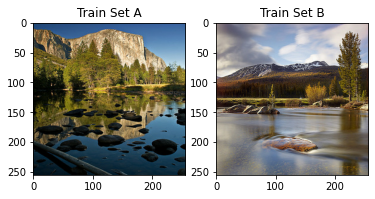

In [ ]:
inpA = next(iter(train_a))
inpB = next(iter(train_b))

plt.subplot(121)
plt.title('Train Set A')
plt.imshow(inpA[0]*0.5+0.5)

plt.subplot(122)
plt.title('Train Set B')
plt.imshow(inpB[0]*0.5+0.5)

In [ ]:
# 생성기, 판별기 구성을 위해 3개 하위모듈 (업샘플링, 다운샘플링, 잔차계층) 설계
# 자세한건 git에 있음
def Generator():
  down_stack = [
      downsample(64,4,apply_batchnorm = False)
      downsample()
  ]

  #### 나중에,,

## 단어 임베딩

In [ ]:
# 단어 임베딩 (Word Embedding): 어휘의 단어나 구가 실수의 벡터로 매핑되는 NLP에서의 언어 모델링과 특징 학습 기술의 집합
# 텍스트를 실수로 변환하는 과정을 거침 (원 핫 인코딩과 다름.)
# 분산 가설에 기반을 두는데, 유사한 맥락에서 등장하는 단어들은 비슷한 의미을 갖는 경향이 있다는 뜻으로 해석함.

# 원핫인코딩, TF-IDF, LSA, 주제 모델링 기법 등이 있음 (원핫인코딩과 TF-IDF는 비교적 희소함)

In [ ]:
# 분산 표현: 한 단어의 의미를 문맥상에서 다른 단어와의 관계를 고려해 포착하려 시도함
# 예시: '파리는 프랑스의 수도다.', '베를린은 독일의 수도다.'
# 위 문장에서 분산 임베딩 공간에 대해 설명하면, 유사한 문맥에서 사용한 단어들은 서로 가깝게 위치하는 공간이라 할 수 있음.

In [ ]:
# 정적 임베딩(static embedding): 단어를 키로 사용하고, 해당 벡터를 값으로 사용한 사전으로 생각함
# 단어는 사용 방법과 관계 없이 동일한 임베딩을 가지므로, 중의어에 대해 해석이 불가능함
# 정적 임베딩 종류: Word2Vec, GloVe

# Word2Vec
# Word2Vec의 아키텍쳐로 CBOW, Skip-gram 등이 있음 (CBOW가 빠르지만, 빈도가 낮은 단어 예측엔 스킵그램이 효과적임)
# CBOW: 창과 문맥 단어를 설정해주면 주변 단어 기반 목표 단어를 예측함. 문맥 단어의 순서는 예측에 영향 x
# Skip-gram: 문맥 단어가 주어지면 모델이 문맥 단어의 주변 단어를 예측함.

# 우리가 중요하게 여겨야 할 것: 학습된 가중치 (Embedding)

# GloVe(Global Vectors for word representation, 단어 표현 전역 벡터) - 비지도학습 알고리즘
# GloVe는 카운트 기반 모델로, 훈련 말뭉치에서 동시에 등장하는 쌍의 대형 행렬(단어, 문맥)을 구성함. 행은 단어, 열은 문맥에 해당
# 문맥은 일반적으로 하나 이상의 단어 시퀀스에 해당하고, 행렬의 각 요소는 문맥에서 단어가 얼마나 자주 발생했는지 나타내줌
# 그 후 동시 발생 행렬을 한 쌍의 (단어, 특징) 및 (특징, 문맥) 행렬로 분해해줌. 이 과정을 '행렬 분해'라고 하며, 반복적 수치 기법인
# 그래디언트 하강(SGD)으로 수행됨. 행렬 R을 인수 P와 Q로 인수분해한다고 가정했을 때,
# 식은 R = P * Q ~ R' 임. SGD는 임의의 값으로 구성된 P와 Q로 시작해 이들을 곱하여 행렬 R'을 재구성하려고 함. R'이 R에 가까이
# 이동하려면 P와 Q 값이 얼마나 많이 변화해야 하는지 나타내는데, 이 변화가 손실임. 이 것은 손실이 허용 가능한 임계값에 될 때까지 반복
# 이 시점에서 (단어, 특징) 행렬 P는 GloVe 임베딩이 됨.

# 참고: GloVe 프로젝트 홈페이지

In [ ]:
# gensim을 사용한 맞춤형 임베딩 생성: text8이라는 작은 말뭉치 사용하여 임베딩 생성 예시 사용
import gensim.downloader as api
from gensim.models import Word2Vec

dataset = api.load('text8')
model = Word2Vec(dataset)

model.save('/content/text8_word2vec.bin')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
# gensim을 사용한 임베딩 공간 탐색
from gensim.models import KeyedVectors

model = KeyedVectors.load('/content/text8_word2vec.bin')
word_vectors = model.wv

In [ ]:
words = word_vectors.vocab.keys()
print([x for i, x in enumerate(words)if i < 10])
assert("king" in words)

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [ ]:
# similar 함수 기반 특정 단어와 유사한 단어 검색
def print_most_similar(word_conf_pairs, k):
  for i, (words, conf) in enumerate(word_conf_pairs):
    print("{:.3f}{:s}".format(conf, words))
    if i >= k-1:
      break
  if k < len(word_conf_pairs):
    print("...")

print_most_similar(word_vectors.most_similar("king"), 5)

0.753prince
0.743emperor
0.738queen
0.703kings
0.698vii
...


In [ ]:
print_most_similar(word_vectors.most_similar(
    positive = ['france', 'berlin'], negative = ['paris']), 1
)

0.798germany
...


In [ ]:
print_most_similar(word_vectors.most_similar_cosmul(
    positive = ['france', 'berlin'], negative = ['paris']), 1
)

# 코사인 유사도 활용해서 더 높게 나왔음

0.964germany
...


In [ ]:
# doesnt_match: 단어 목록 중 이상 항목 탐지
print(word_vectors.doesnt_match(['hindus', 'parsis','singapore','christians']))

singapore


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
# 두 단어 사이 유사성 거리 계산
for word in ['woman','dog','whale','tree']:
  print('similarity({:s}, {:s}) = {:.3f}'.format('man', word, word_vectors.similarity('man', word)))

# man과 woman의 유사성 거리가 제일 가깝게 나왔고, man과 whale의 유사성이 가장 적음

similarity(man, woman) = 0.717
similarity(man, dog) = 0.444
similarity(man, whale) = 0.242
similarity(man, tree) = 0.254


In [ ]:
# similar_by_word 함수: similar 함수와 기능은 같지만, 단어를 비교하기 전에 벡터가 정규화된다는 차이가 있음
print(print_most_similar(
    word_vectors.similar_by_word('singapore'), 5
))

# 이 외에도, distance 함수 사용하여 임베딩 공간에서 두 단어 사이 거리 계산 가능 (1 - similarity()와 값 같음)

0.881malaysia
0.837philippines
0.835bhutan
0.830zambia
0.826brunei
...
None


In [ ]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 7.5 MB/s 


In [ ]:
import pandas as pd
df = pd.read_spss('/content/GP18__2019.SAV')

ReadstatError: ignored